### Natural Language Processing

- Natural Language Processing or NLP for short refers to a branch of Computer Science (to be more specific it is a branch of Artificial Intelligence or AI) where computers can understand text or spoken word in the same way humans can.
- NLP combines computational linguistics—rule-based modeling of human language—with statistical, machine learning, and deep learning models. Together, these technologies enable computers to process human language in the form of text or voice data and to ‘understand’ its full meaning, complete with the speaker or writer’s intent and sentiment.
- We will make use of the following libraries:
    - **sklearn**
    - **nltk**
- Real world applcations include:
    - machine translation
    - spam detection
    - text summarisation
    - chatbots

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
from string import punctuation
from itertools import chain

from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, f1_score

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_selection import SelectPercentile, chi2, f_regression, f_classif

from sklearn import svm
from sklearn.utils import shuffle

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import ngrams

**CountVectorizer** - Count Vector is a matrix notation of the dataset in which every row represents a document from the corpus, every column represents a term from the corpus, and every cell represents the frequency count of a particular term in a particular document.

In [5]:
corpus = ['Apple Orange Orange Apple',\
  'Apple Banana Apple Banana',\
  'Banana Apple Banana Banana Banana Apple',\
  'Banana Orange Banana Banana Orange Banana',\
  'Banana Apple Banana Banana Orange Banana']

print("Using count vectorizer")
tf_vectorizer = CountVectorizer()
tf = tf_vectorizer.fit_transform(corpus)
print(pd.DataFrame(tf.A, columns=tf_vectorizer.get_feature_names()).to_string())

Using count vectorizer
   apple  banana  orange
0      2       0       2
1      2       2       0
2      2       4       0
3      0       4       2
4      1       4       1


**TfidfVectorizer** - TF-IDF score represents the relative importance of a term in the document and the entire corpus. TF-IDF score is composed by two terms: the first computes the normalized Term Frequency (TF), the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.

- tf(t) = No. of times term ‘t’ occurs in a document
- idf(t) = log e [ (1+n) / ( 1 + df(t) ) ] + 1 (default i:e smooth_idf = True)
- Reference: https://www.analyticsvidhya.com/blog/2021/11/how-sklearns-tfidfvectorizer-calculates-tf-idf-values/

In [6]:
print("\nUsing tfidf")
tfidf_vec = TfidfVectorizer()
tfidf = tfidf_vec.fit_transform(corpus)
print(pd.DataFrame(tfidf.A, columns=tfidf_vec.get_feature_names()).to_string())


Using tfidf
      apple    banana    orange
0  0.643744  0.000000  0.765241
1  0.707107  0.707107  0.000000
2  0.447214  0.894427  0.000000
3  0.000000  0.859622  0.510931
4  0.233043  0.932173  0.277026


### Dataset:
- https://www.kaggle.com/snap/amazon-fine-food-reviews?select=Reviews.csv

In [8]:
df = pd.read_csv('Reviews.csv')

In [17]:
df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [18]:
df.shape

(568454, 10)

- We would like to get an idea of the number of records that are 3 star and lower as well as 3 star and higher.

In [19]:
pos = df[df['Score']>3]
neg = df[df['Score']<3]
print(pos.shape, neg.shape)

(443777, 10) (82037, 10)


In [20]:
pos = pos.head(neg.shape[0])
print(pos.shape, neg.shape)
df = pd.concat([pos,neg])

(82037, 10) (82037, 10)


In [21]:
df = shuffle(df)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
17334,17335,B000EVIDUY,A3I6IRC6PKRFZZ,not_her_again,0,0,5,1251849600,Best GF Brownie Mix,"We've tried many brands of GF brownie mix, and..."
379452,379453,B007RLRCLK,A3827I7HIP1LMB,christine,0,1,1,1346025600,Tasteless!,"I used to get ""Juniper Ridge Juniper Ridge Whi..."
55087,55088,B002MZAJ0M,A2OI09LAVC6TO3,"Jacqueline Clonan ""Kitchen Princess""",1,1,5,1291593600,OMG....THE BEST!!!!!,I have been eating ONLY Flahavan's brand for a...
92651,92652,B001AHJ2D8,AT9U5ZE5OO84C,"M. Kooiman ""nerdette""",7,7,5,1221523200,A tasty snack for the health conscious,"I am a label reader - I count fat grams, carbs..."
61617,61618,B001EO5R0Y,A21XUSS7STBPPY,"Laurence E. Spaner ""Lee Spaner""",0,0,4,1339632000,Jasmine Green Tea.,Stash has done a fine packaging job on its org...


### Preprocessing
- Remove all neutral scores and seperate the remaning into positive = 1 and negative = 0.
- Preprocessing ususally involves:
    - Removing additional white spaces
    - Replacing emoji's with a word representation for example :) ==> smile
    - Removing links from the corpus
    - Removing punctuation
    - Removing HTML tags
    - Remove duplicate reviews
    - Here are some good links on how to process and clean text: https://adataanalyst.com/scikit-learn/countvectorizer-sklearn-example/ and https://machinelearningmastery.com/clean-text-machine-learning-python/

- **For this exercise we will only tokenize reviews, that is change "This is a review" to ['this', 'is', 'a', 'review'].**
- After the text is 'clean' we will use sklearn.

In [22]:
df = df[df['Score'] !=3]
X = df['Text']

y_map = {1:0, 2:0, 4:1, 5:1}
y = df['Score'].map(y_map)

In [36]:
X.head(5)

34524     Amazon has put together the perfect coffee at ...
68328     So I made one bag of these pork rinds & it cam...
519450    I don't know how what I tried could be conside...
43745     I have to be brutally Honest here. I have been...
78837     I had never used this product before and had r...
Name: Text, dtype: object

In [37]:
y.head(5)

34524     1
68328     0
519450    0
43745     1
78837     1
Name: Score, dtype: int64

### Classification

Once the text is processed the next step is to do the actual classification. For this exercise we will be using a Logistic Regression Classifier. However there are many other popular classifiers that may perform better:

- Support Vector Machine and its variants
- Naive Bayes and its variants
- Random Forests and its variants

Let's create a function that takes in the training set X , test set y, the model being used model and the classification algorithm clf_model as well as a variable that will show the top coefficients if true coef_show

In [38]:
def text_fit(X, y, model, clf_model, coef_show=1):
    X_c = model.fit_transform(X)
    print('# features: {}'.format(X_c.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_c, y, random_state=0)
    print('# train records: {}'.format(X_train.shape[0]))
    print('# test records: {}'.format(X_test.shape[0]))
    clf = clf_model.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    recall = recall_score(y_test,y_pred)
    print ('Model Recall: {}'.format(recall))
    if coef_show == 1: 
        w = model.get_feature_names()
        coef = clf.coef_.tolist()[0]
        coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
        coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
        print('')
        print('-Top 20 positive-')
        print(coeff_df.head(20).to_string(index=False))
        print('')
        print('-Top 20 negative-')        
        print(coeff_df.tail(20).to_string(index=False))

### Classification Experiments

- Logistic regression model on word count
- Logistic regression model on TFIDF
- Logistic regression model on TFIDF + ngram

NGram Defn: N-grams of texts are extensively used in text mining and natural language processing tasks. 

They are basically a set of co-occuring words within a given window and when computing the n-grams you typically move one word forward (although you can move X words forward in more advanced scenarios). 

[Explanation and Example Here](https://blog.xrds.acm.org/2017/10/introduction-n-grams-need/)

In [39]:
c = CountVectorizer(stop_words = 'english')
text_fit(X, y, c, LogisticRegression()

# features: 68923
# train records: 123055
# test records: 41019
Model Recall: 0.9069948438564063

-Top 20 positive-
        Word  Coefficient
  pleasantly     3.050263
       penny     2.762445
    downside     2.759462
    drawback     2.740516
      hooked     2.721683
   addicting     2.548465
      resist     2.474370
    soothing     2.398312
     welcome     2.367762
     worries     2.344691
prescription     2.300742
       holds     2.281033
         met     2.208633
   skeptical     2.180317
   delighted     2.168944
    hesitant     2.167149
         fav     2.144379
    tastiest     2.140525
      intend     2.093224
    terrific     2.050142

-Top 20 negative-
         Word  Coefficient
   overpowers    -2.452483
    advertise    -2.463766
      assumed    -2.464807
     disaster    -2.474081
     terrible    -2.481509
      expired    -2.489185
    deceptive    -2.540339
      sounded    -2.549353
     inferior    -2.562908
   returnable    -2.588292
disappointing    -2.59

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
tfidf = TfidfVectorizer(stop_words = 'english')
text_fit(X, y, tfidf, LogisticRegression())

# features: 68923
# train records: 123055
# test records: 41019
Model Recall: 0.901692771670396

-Top 20 positive-
     Word  Coefficient
    great    11.230130
delicious    10.146946
     best     9.370887
  perfect     9.233173
excellent     8.124602
    loves     7.856340
   highly     7.218414
wonderful     6.982520
     love     6.973765
  amazing     6.570629
  awesome     6.528989
     good     6.397672
     nice     6.099353
   hooked     5.984700
 favorite     5.890149
    yummy     5.763691
  pleased     5.762933
   smooth     5.273810
     glad     5.228730
     easy     5.215504

-Top 20 negative-
          Word  Coefficient
         money    -5.377284
      thinking    -5.586734
         sorry    -5.613868
        hoping    -5.656859
         waste    -5.700791
    disgusting    -6.103029
         stale    -6.127895
        return    -6.170163
       thought    -6.173334
         threw    -6.348600
         bland    -6.405121
disappointment    -6.780750
          weak    -

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [193]:
tfidf_n = TfidfVectorizer(ngram_range=(1,2), stop_words = 'english')
text_fit(X, y, tfidf_n, LogisticRegression())

# features: 1932701
# train records: 123055
# test records: 41019
Model Recall: 0.9129779161397023

-Top 20 positive-
     Word  Coefficient
    great    17.215651
delicious    14.005601
     best    13.844368
  perfect    12.393208
    loves    11.129136
     love    10.837305
excellent    10.396867
wonderful     9.468439
     good     9.323358
     nice     9.189185
 favorite     8.829766
     easy     7.710652
  amazing     7.678862
  awesome     7.546582
    happy     7.189883
    tasty     7.064533
   highly     6.931065
    yummy     6.853734
  pleased     6.804395
   smooth     6.590717

-Top 20 negative-
          Word  Coefficient
    disgusting    -6.482658
        hoping    -6.639022
         waste    -6.685375
         threw    -6.920282
disappointment    -7.030280
         maybe    -7.099295
         bland    -7.471922
        return    -7.626255
         money    -7.717590
           bad    -7.744674
         stale    -8.099472
          weak    -8.355254
       thought  

- There are quite a few features in our bag of words, more than 1 million!

- We will cut it down a bit to help our runtime in the following steps using sklearn's SelectPercentile function.

- SelectPercentile selects the top features of a dataset which allows us to discard features which are not as important.

- Note with SelectPercentile there is a default score function: f_classif. You can however specify others such as chi2 and f_regression.

In [49]:
def text_fit_v2(X, y, model, clf_model, select_percentile_value, coef_show=1):
    X_c = model.fit_transform(X)
    print('# features before applying select percentile: {}'.format(X_c.shape[1]))
    select_percentile = SelectPercentile(f_classif, select_percentile_value)
    X_transformed = select_percentile.fit_transform(X_c, y)
    print('# features after applying select percentile: {}'.format(X_transformed.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, random_state=0)
    print('# train records: {}'.format(X_train.shape[0]))
    print('# test records: {}'.format(X_test.shape[0]))
    clf = clf_model.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    recall = recall_score(y_test,y_pred)
    print ('Model Recall: {}'.format(recall))
    if coef_show == 1:
        idx = np.arange(0, X_c.shape[1])  #create an index array
        features_to_keep = idx[select_percentile.get_support() == True]
        cols = np.array(list(model.vocabulary_.keys()))
        w = cols[features_to_keep]
        coef = clf.coef_.tolist()[0]
        coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
        coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
        print('')
        print('-Top 20 positive-')
        print(coeff_df.head(20).to_string(index=False))
        print('')
        print('-Top 20 negative-')        
        print(coeff_df.tail(20).to_string(index=False))

In [50]:
tfidf_n = TfidfVectorizer(ngram_range=(1, 2), stop_words = 'english')
text_fit_v2(X, y, tfidf_n, LogisticRegression(), 50, 1)

# features before applying select percentile: 1932701


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass percentile=50 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


# features after applying select percentile: 966350
# train records: 123055
# test records: 41019


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Recall: 0.9134705102391593

-Top 20 positive-
               Word  Coefficient
     shapes instead    17.004518
         fact grain    14.095826
         little tea    14.041470
          kick best    12.244884
   process tapanade    11.454855
         exetremely    10.870213
      older recipes    10.239692
        pepper huge     9.544268
    box alternative     9.234787
       pacific rice     8.846125
       softer dried     8.843937
       cereal awful     8.065470
    surrendering ve     7.575784
         pecan date     7.458158
         comes trap     7.134594
       game parties     7.111197
    similar keebler     6.761798
suggestions rinsing     6.758402
expected appearance     6.613171
   whimper mornings     6.586329

-Top 20 negative-
                  Word  Coefficient
       purely customer    -6.391973
perfectly instructions    -6.747894
           soon parted    -6.753375
           gotten warm    -6.801089
         odorless easy    -6.941132
          paper wipi

- Let us present a scenario that depicts the issue with using accuracy for a **skewed** dataset. In **our case, our dataset is balanced selecting accuracy as our metric is fine**.
- We have trained a machine learning model using a variety of features (age, ethnicity, bmi, body fat percentage, ) to predict whether a person has diabetes.
- We are presented with 100 persons perform predictions on.
- The confusion matrix depicted below showcases a summary of prediction results:
    - True Positives (TP): These are cases in which we predicted yes (they have diabetes), and they do have the diabetes.
    - True Negatives (TN): We predicted no, and they don't have diabetes.
    - False Positives (FP): We predicted yes, but they don't actually have diabetes. (Also known as a "Type I error.")
    - False Negatives (FN): We predicted no, but they actually do have diabetes. (Also known as a "Type II error.")

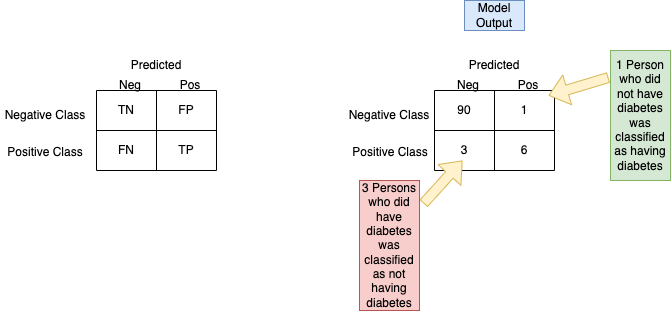


- **Accuracy**: We have over 96% accuracy! This is simply because less than 5% of our data is actually diabetic persons.
- **Precision:** When it predicts yes, how often is it correct? TP/predicted yes = 6/7 = 0.857
- **Recall**: When it's actually yes, how often does it predict yes? TP/actual yes = 6/9 = 0.666
- **F1-Score**: The harmonic mean of precision and recall - 2 * ((precision * recall) / (precision + recall)) = 0.75
- The higher the F1 score the better, with 0 being the worst possible and 1 being the best.
- In this case we might be more concerned with Recall as opposed to Precision.
- We may also want to increase the penalty for FN since they are more detrimental than a FP.
- https://link.springer.com/chapter/10.1007/978-3-030-36178-5_4
- Some material referenced from: https://www.analyticsvidhya.com/blog/2020/09/precision-recall-machine-learning/

### Topic Modelling

Topic modeling is an unsupervised machine learning technique that’s capable of scanning a set of documents, detecting word and phrase patterns within them, and automatically clustering word groups and similar expressions that best characterize a set of documents.

Non Negative Matrix Factorization (NMF), Latent Dirichlet Allocation (LDA) and Single Value Decomposition (SVD) algorithms will be used to find topics in a document collection. The output of the derived topics involved assigning a numeric label to the topic and printing out the top words in a topic.

The algorithms are not able to automatically determine the number of topics and this value must be set when running the algorithm. Comprehensive documentation on available parameters is available for both [NMF](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html), [LDA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html#sklearn.decomposition.LatentDirichletAllocation) and [SVD](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html).

- https://medium.com/analytics-vidhya/topic-modeling-with-non-negative-matrix-factorization-nmf-3caf3a6bb6da
- https://www.analyticsvidhya.com/blog/2021/06/part-18-step-by-step-guide-to-master-nlp-topic-modelling-using-lda-probabilistic-approach/
- https://towardsdatascience.com/latent-semantic-analysis-distributional-semantics-in-nlp-ea84bf686b50

In [42]:
def display_topics(H, W, feature_names, documents, no_top_words, no_top_documents):
    for topic_idx, topic in enumerate(H):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        print("\n")
        top_doc_indices = np.argsort( W[:,topic_idx] )[::-1][0:no_top_documents]
        for doc_index in top_doc_indices:
            print(documents[doc_index])
            print("\n")

In [44]:
documents = list(X)[0:10000]
print(len(documents))

10000


In [45]:
# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(documents)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

In [46]:
# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names()

In [47]:
no_topics = 5

In [48]:
# Run NMF
nmf_model = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)
nmf_W = nmf_model.transform(tfidf)
nmf_H = nmf_model.components_

In [49]:
no_top_words = 10
no_top_documents = 4
print("NMF Topics \n\n")
display_topics(nmf_H, nmf_W, tfidf_feature_names, documents, no_top_words, no_top_documents)

NMF Topics 


Topic 0:
like taste good product flavor just great love really chocolate


I really, really wanted to like this product as I think it's a great idea, but I just didn't like the taste. I love sweet tea and was really looking forward to loving this product, so was very disappointed. I tried it in a bottle of water, then twice in a glass with more, then less water. Tried adding more of the liquid to the water, but could never get it to taste like sweet tea. It tasted like chemicals and was undrinkable. Couldn't add it by the drop, as it was hard to squeeze the bottle, then it squirted out and you couldn't really control the amount. Had someone else try it as well, and they had the same problem. They also didn't like the taste. Sorry that this doesn't work, as it's a great idea.


After reading all the glowing reviews, I decided to order this for my son's lunch brown bag. I found it taste a little stale, just not the fresh taste like you know when you are eating a good chocol

In [50]:
# Run LDA
lda_model = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)
lda_W = lda_model.transform(tf)
lda_H = lda_model.components_

In [51]:
print("\n\nLDA Topics \n\n")
display_topics(lda_H, lda_W, tf_feature_names, documents, no_top_words, no_top_documents)



LDA Topics 


Topic 0:
coffee tea like flavor cup taste good br just green


To me this coffee was extremely bitter.  I dumped it out and made a different cup.  It made me afraid to try other WP coffees but I did like the WP Sumatra Kopi Raya.<br /><br />For reference purposes my in store drink is a Starbucks Americano.<br /><br />My favorite k-cups are:<br />Starbucks French Roast<br />Starbucks Caffe Verona<br />Starbucks Pike Place Roast<br />Green Mountain Xtra Bold Sumatran Reserve<br />Green Mountain Double Black Diamond<br />Green Mountain Revv<br />Green Mountain Dark Magic<br /><br />Other k-cups I've tried:  Coffee People Jet Fuel ,Green Mountain Dark Magic Decaf, Emeril Jazzed up Decaf, Starbucks Caffe Verona, Coffee People Black Tiger,  Starbucks House Blend, Starbucks Breakfast Blend, Starbucks Sumatra, Wolfgang Puck French Roast, Green Mountain Lake and Lodge, Green Mountain French Roast, Caribou Mahogony, Wolfgang Puck Sumatra Kopi Raya, Emeril Big Easy Bold


I found 

In [52]:
#SVD
lsi_model = TruncatedSVD(n_components=no_topics, n_iter=7, random_state=42).fit(tf)
lsi_W = lsi_model.transform(tf)
lsi_H = lsi_model.components_

In [53]:
print("\n\nLSI Topics \n\n")
display_topics(lsi_H, lsi_W, tf_feature_names, documents, no_top_words, no_top_documents)



LSI Topics 


Topic 0:
br like food just product good taste coffee flavor tea


[...]<br />Recall -- Firm Press Release<br /><br />FDA posts press releases and other notices of recalls and market withdrawals from the firms involved as a service to consumers, the media, and other interested parties. FDA does not endorse either the product or the company.<br />Creative Energy Foods, Inc. Recalls Crunch® thinkThin Nutrition Bars Due to Possible Health Risk Associated With Sunland Inc. Peanut Products<br /><br />Contact:<br />Consumer:<br />510-567-1200<br /><br />FOR IMMEDIATE RELEASE - October 12, 2012 - Creative Energy Foods, Inc. (CEF) is voluntarily recalling Crunch® thinkThin nutrition bars which may contain blanched roasted peanuts supplied by Sunland , Inc. to CEF. The decision was made as the result of the expanded recall of peanut butter, nut butters and peanut products by Sunland because of potential contamination with Salmonella.<br /><br />Salmonella bacteria can cause serio

### WordCloud

In [13]:
from wordcloud import WordCloud, STOPWORDS

In [36]:
def print_cloud(data):
    text = " ".join(review for review in data)
    print ("There are {} words in the combination of all reviews.".format(len(text)))
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
    return wordcloud

There are 74300872 words in the combination of all review.


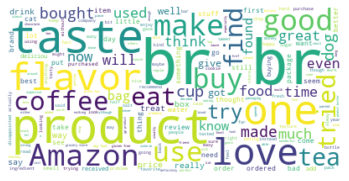

In [37]:
wordcloud = print_cloud(df['Text'])
fig = plt.figure(1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
fig.savefig("word1.png", dpi=300)